<a href="https://colab.research.google.com/github/mojoyinkimberly/penguin_classification/blob/main/ClassifyingPenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [392]:
penguin_dataset = pd.read_csv("/content/penguins_lter.csv", sep = ",")
penguin_dataset.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


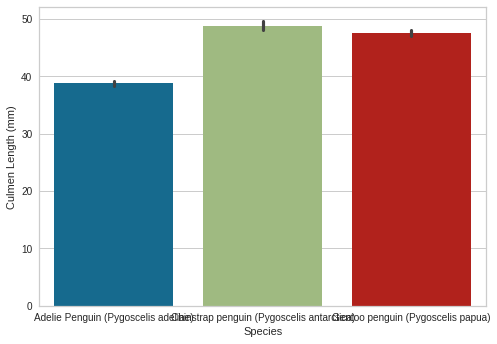

In [393]:
sns.barplot(x='Species',y='Culmen Length (mm)',data=penguin_dataset)

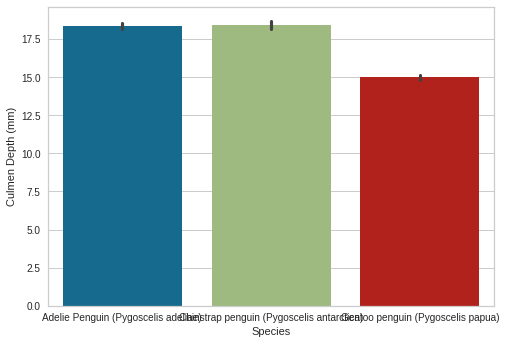

In [394]:
sns.barplot(x='Species',y='Culmen Depth (mm)', data=penguin_dataset)

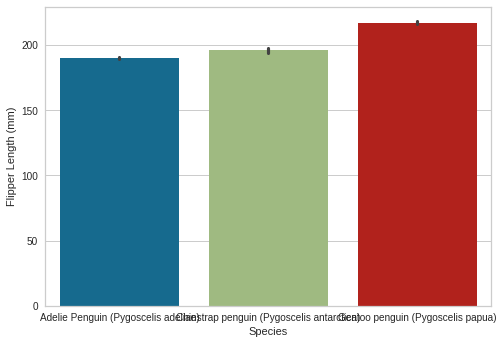

In [395]:
sns.barplot(x = 'Species', y ='Flipper Length (mm)', data=penguin_dataset)

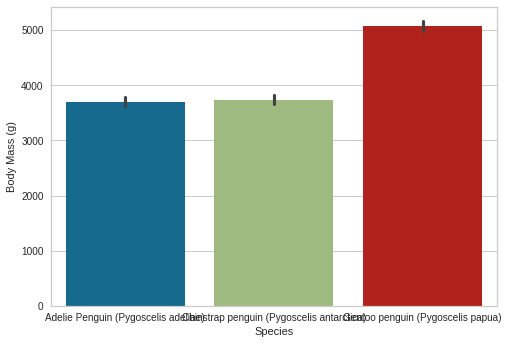

In [396]:
sns.barplot(x='Species',y='Body Mass (g)', data = penguin_dataset)

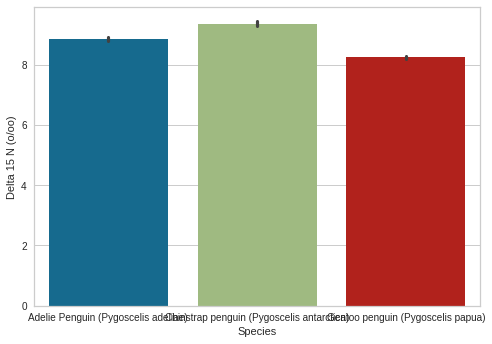

In [397]:
sns.barplot(x = 'Species', y = 'Delta 15 N (o/oo)', data = penguin_dataset)

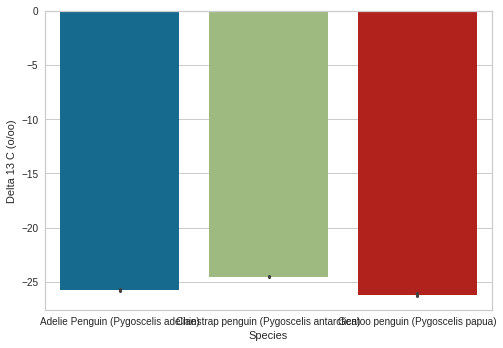

In [398]:
sns.barplot(x = 'Species', y = 'Delta 13 C (o/oo)', data = penguin_dataset)

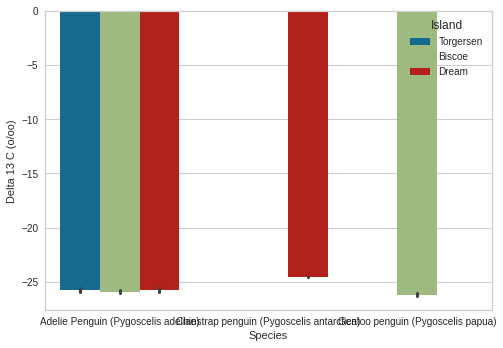

In [399]:
sns.barplot(x = 'Species', y = 'Delta 13 C (o/oo)',hue = 'Island', data = penguin_dataset)

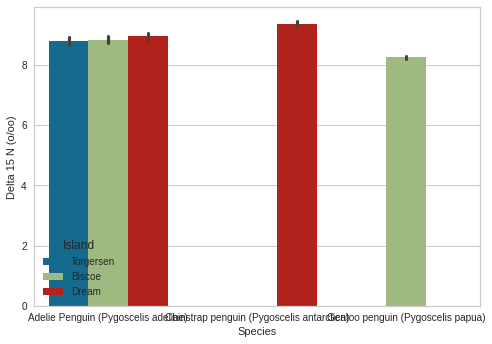

In [400]:
sns.barplot(x = 'Species', y = 'Delta 15 N (o/oo)',hue = 'Island', data = penguin_dataset)

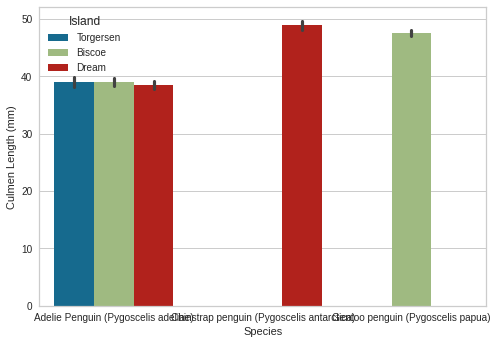

In [401]:
sns.barplot(x = 'Species', y = 'Culmen Length (mm)',hue = 'Island', data = penguin_dataset)

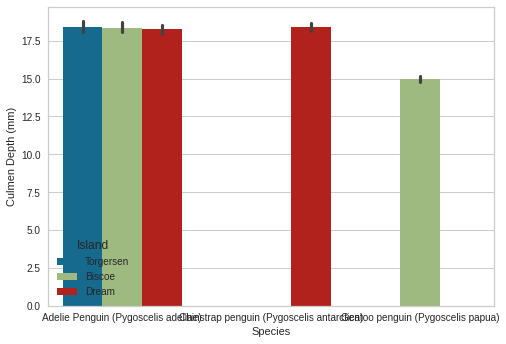

In [402]:
sns.barplot(x = 'Species', y = 'Culmen Depth (mm)',hue = 'Island', data = penguin_dataset)

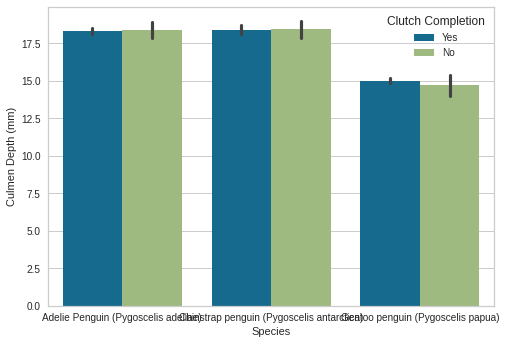

In [403]:
sns.barplot(x = 'Species', y = 'Culmen Depth (mm)',hue = 'Clutch Completion', data = penguin_dataset)

In [404]:
penguin1 = penguin_dataset.drop(['studyName','Sample Number','Individual ID','Stage','Comments','Region','Date Egg'],axis =1)

In [405]:
encode = OrdinalEncoder()
penguin1[['specie', 'island','clutch_completion','sex']] = encode.fit_transform(penguin1[['Species','Island','Clutch Completion','Sex']])

In [406]:
penguin2 = penguin1.drop(columns = ['Species','Island','Clutch Completion','Sex'])
penguin2

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),specie,island,clutch_completion,sex
0,39.1,18.7,181.0,3750.0,NaN,NaN,0.0,2.0,1.0,2.0
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454,0.0,2.0,1.0,1.0
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302,0.0,2.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN
340,46.8,14.3,215.0,4850.0,8.41151,-26.13832,2.0,0.0,1.0,1.0
341,50.4,15.7,222.0,5750.0,8.30166,-26.04117,2.0,0.0,1.0,2.0
342,45.2,14.8,212.0,5200.0,8.24246,-26.11969,2.0,0.0,1.0,1.0


In [407]:
penguin2.isna().sum()

Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
specie                  0
island                  0
clutch_completion       0
sex                    10
dtype: int64

In [408]:
penguin3 = penguin2.fillna(penguin2.median())

In [409]:
penguin3.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),specie,island,clutch_completion,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093,8.730086,-25.691855,0.918605,0.662791,0.895349,1.514535
std,5.443792,1.969060,14.023826,799.696532,0.540630,0.779277,0.893320,0.726194,0.306549,0.506308
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000,0.000000,0.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460,0.000000,0.000000,1.000000,1.000000
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520,1.000000,1.000000,1.000000,2.000000
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467,2.000000,1.000000,1.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670,2.000000,2.000000,1.000000,2.000000


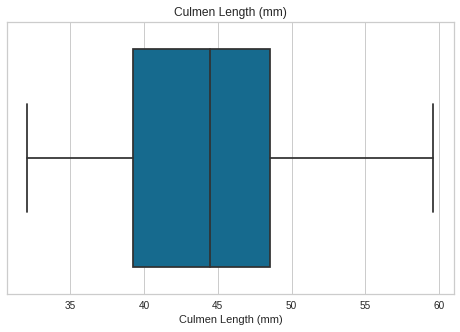

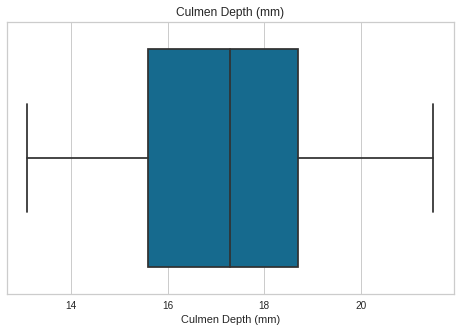

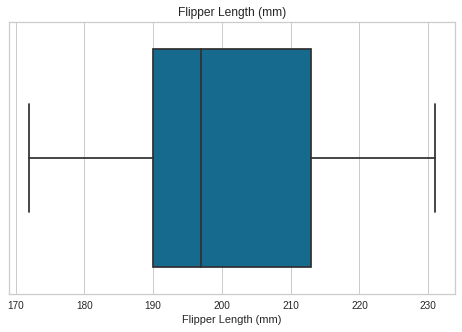

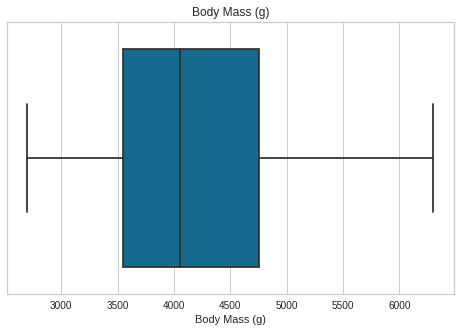

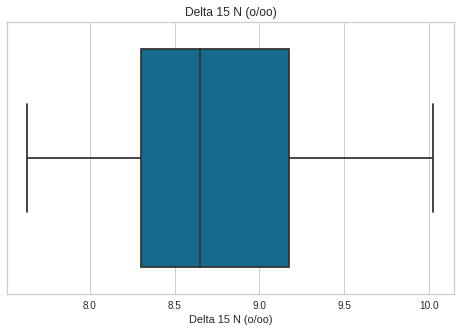

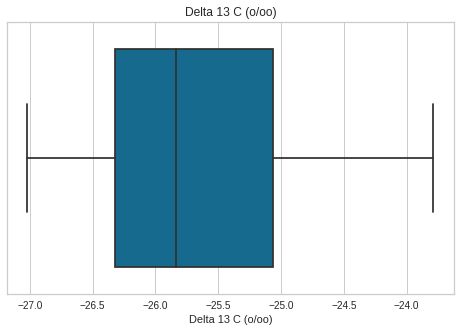

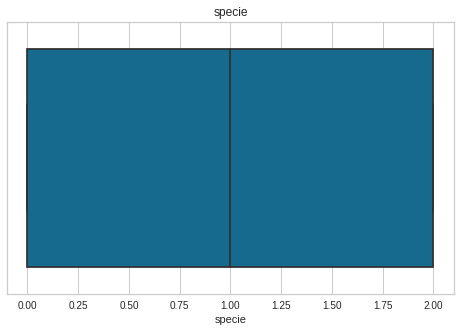

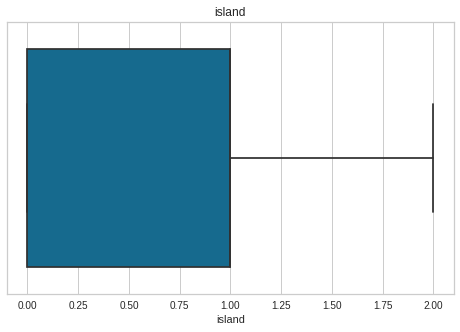

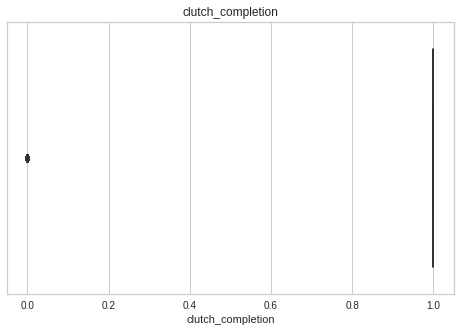

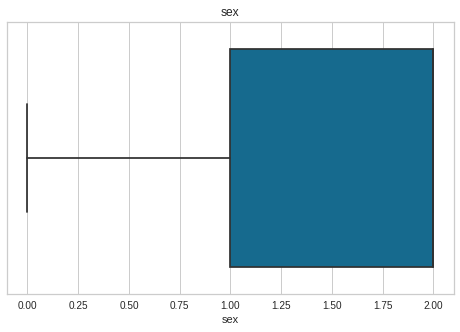

In [410]:
for column in ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'specie', 'island', 'clutch_completion', 'sex']:
  plt.figure(figsize=(8, 5))
  sns.boxplot(data = penguin2, x = column)
  plt.title(column)
  plt.show()

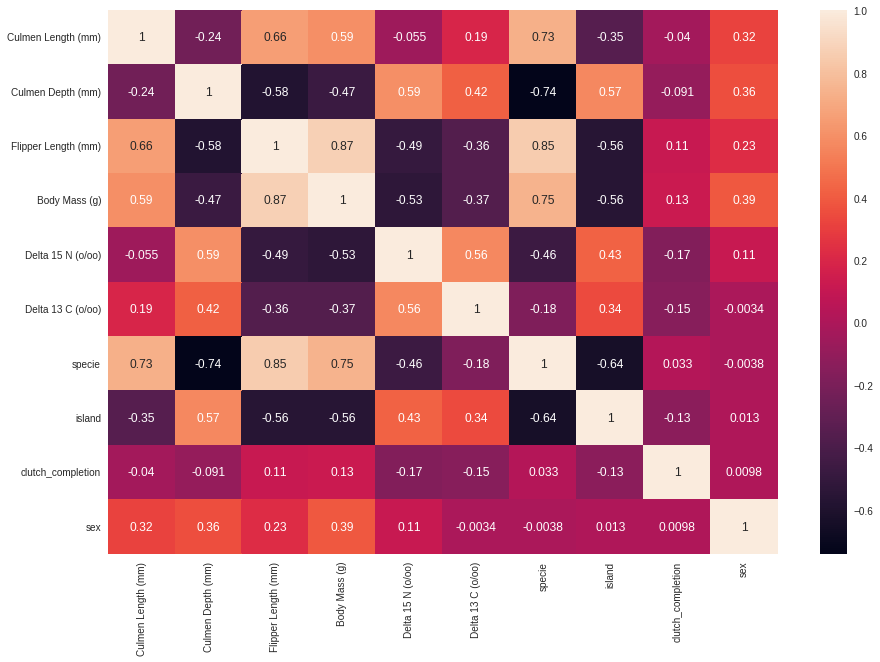

In [411]:
plt.figure(figsize=(15, 10))
sns.heatmap(penguin3.corr(), annot = True)

In [412]:
y = penguin3['specie']
x = penguin3.drop(['specie'],axis = 1)

In [413]:
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

In [414]:
x.isna().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
island                 0
clutch_completion      0
sex                    0
dtype: int64

In [415]:
calcu_mult(x)

,variables,VIF
0,Culmen Length (mm),189.653197
1,Culmen Depth (mm),210.379120
2,Flipper Length (mm),1276.667031
3,Body Mass (g),179.144285
4,Delta 15 N (o/oo),445.254466
5,Delta 13 C (o/oo),800.280368
6,island,3.280206
7,clutch_completion,10.016102
8,sex,20.303600


In [416]:
sample = RandomOverSampler(random_state = 0)
x, y = sample.fit_resample(x, y)

In [417]:
normalizer = StandardScaler()
normed = pd.DataFrame(normalizer.fit_transform(x))

In [418]:
X_train, x_test, y_train, y_test = train_test_split(normed, y, test_size=.20, random_state= 45)

In [419]:
pca = PCA(n_components=9)
pca_model = pca.fit(normed)
PCA(n_components = 9)

PCA(n_components=9)

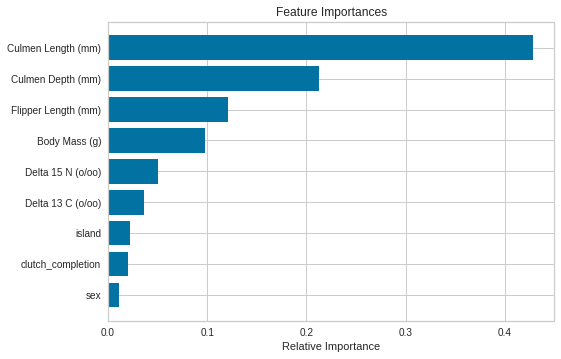

In [420]:
features = x.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 1.0, 'Elbow curve')

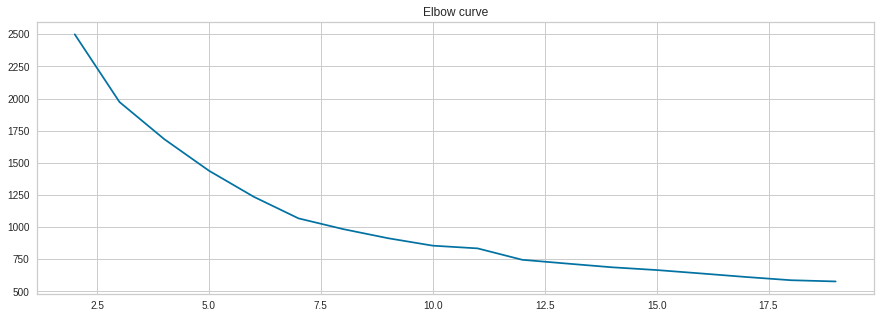

In [421]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normed)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

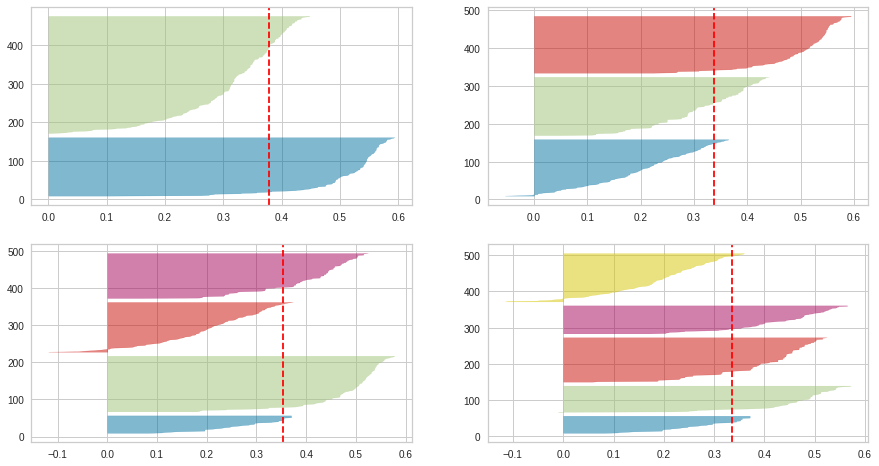

In [422]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(normed)

In [423]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train,y_train)

In [424]:
knn_model.score(X_train,y_train)

0.9972527472527473

In [425]:
y_predict = knn_model.predict(x_test)

In [426]:
confusion_matrix(y_test, y_predict)

array([[28,  1,  0],
       [ 0, 32,  0],
       [ 0,  0, 31]])

In [427]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        29
         1.0       0.97      1.00      0.98        32
         2.0       1.00      1.00      1.00        31

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [428]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(knn_model, x_test, y_test, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

0.9888888888888889